## Data Science Assignment 5
##### Name: Venkata Sai Manoj Boganadham
##### Roll no: 197121
##### Section: A

### 1. Linear Regression using Sklearn library

Here we are performing Linear Regression on the boston housing dataset that we have already done from scratch.

First let us import the required modules

In [31]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

##### First we need to load the dataset
For that, we will use the dataset loading API built into sklearn. 
Then, we need to get the dependent and independent variables from the dataset

In [27]:
# Import boston data from sklearn

# This function is deprecated by sklearn, 
# raw_data = load_boston()

# This is the suggested way to remote import boston dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
# Boston dataframe imported
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# Dependent variables and independent values are separated
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
Y = raw_df.values[1::2, 2]

print(X.shape, Y.shape)

(506, 13) (506,)


##### Splitting the dataset into training and testing parts

In [28]:
# Splitting the dependent and independent variables into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=25)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(404, 13) (102, 13) (404,) (102,)


##### Now, we are ready to build the model 

In [29]:
# Build the linear regression model using sklearn

# We are enabling standardization of data here
# 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
# model = lr(normalize = True)

# If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:
model = make_pipeline(StandardScaler(with_mean = False), lr())

# Fitting the model, i.e. finding the parameters using gradient descent
model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

##### Now we make the predictions out of the model built

In [32]:
# Making predictions using sklearn
Y_pred = model.predict(X_test)
print(Y_pred.shape)

# Getting the Root Mean Squared Error
# When 'squared' is set to False, this method returns the RMSE
rmse = mse(Y_test, Y_pred, squared = False)
print("Root Mean Squared Error of the model is: ", rmse)

(102,)
Root Mean Squared Error of the model is:  4.8360470651852205


It is to be observed that we got the approimately same error when we applied Linear Regression from scratch

### 2. Logisitic Regression on Heart Disease data set

Data set link: https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv

First we need to import required libraries and load the dataset

In [65]:
# Importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Importing the dataset
raw_data = pd.read_csv('heart.csv')
print(raw_data.shape)
raw_data.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Splitting the data into training and testing sets

In [89]:
#Splitting the dataframe
train_data = raw_data.sample(frac=0.8, random_state=42)
test_data = raw_data.drop(train_data.index)

print("Train data:", train_data.shape)
print("Test data:", test_data.shape)

Train data: (242, 14)
Test data: (61, 14)


#### Splitting the raw data into training and testing sets

In [90]:
# Creating the numpy arrays X_train, X_test, Y_train, Y_test
X_train = train_data[train_data.columns[:-1]]
Y_train = train_data[train_data.columns[-1]]
X_test = test_data[test_data.columns[:-1]]
Y_test = test_data[test_data.columns[-1]]

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(242, 13) (61, 13) (242,) (61,)


#### Normalising the X data of training and testing sets

In [91]:
# Function to normalise the dataframe
def norm_dataframe(X):
    X = (X - X.mean())/X.std()
    return X


# Normalising the training and testing data
X_train = norm_dataframe(X_train)
X_test = norm_dataframe(X_test)

print("Normalised training data")
print(X_train.head())
print(X_test.head())

Normalised training data
          age       sex        cp  trestbps      chol       fbs   restecg  \
179  0.288049  0.675233 -0.960180  1.022729  0.511790 -0.423960 -1.000167   
228  0.503863  0.675233  1.956517  2.145690  0.742072 -0.423960 -1.000167   
111  0.288049  0.675233  0.984285  1.022729 -2.366732  2.348967  0.905663   
246  0.180142 -1.474851 -0.960180  0.124361  3.064080 -0.423960 -1.000167   
60   1.798745 -1.474851  0.984285 -1.223192  0.300699  2.348967 -1.000167   

      thalach     exang   oldpeak     slope        ca      thal  
179 -1.703583  1.489116 -0.380228 -0.641393  0.264617 -2.116461  
228  0.380814 -0.668765 -0.719142 -0.641393 -0.705644  1.145855  
111  1.001698 -0.668765 -0.719142  0.958784  0.264617  1.145855  
246 -0.018326  1.489116  0.721243 -0.641393  1.234878  1.145855  
60  -0.905303 -0.668765 -0.888600  0.958784  0.264617 -0.485303  
         age       sex        cp  trestbps      chol       fbs   restecg  \
1  -2.089834  0.692682  1.061296 -0.0594

#### Generating the numpy arrays out of the dataframes

In [92]:
# Generating the numpy arrays
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

# Reshaping train data into 2d matrices
Y_train = Y_train.reshape(len(Y_train), 1)
Y_test = Y_test.reshape(len(Y_test), 1)

print("Shapes of the matrices after splitting from the raw data")
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

# Concatenating the training data with a column of ones
X_train = np.concatenate((np.ones(shape = Y_train.shape, dtype = np.float64), X_train), axis = 1)
X_test = np.concatenate((np.ones(shape = Y_test.shape, dtype = np.float64), X_test), axis = 1)

print("Shapes of the matrices after concatenating ones")
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

Shapes of the matrices after splitting from the raw data
(242, 13)
(242, 1)
(61, 13)
(61, 1)
Shapes of the matrices after concatenating ones
(242, 14)
(242, 1)
(61, 14)
(61, 1)


Since the data is split and scaled, now we can proceed to build our model
### Building the logistic regression model

##### Hypothesis

In [93]:
# Hypothesis of logistic regression
def h(X_train, theta):
    hyp = np.matmul(X_train, theta)
    g = 1/(1 + np.exp(-hyp))
    return g

##### Cost function

In [94]:
def J(X_train, Y_train, theta):
    m = len(Y_train)
    g = h(X_train, theta)
    Y_t = np.transpose(Y_train)
    J = -(1/m) * (Y_t @ np.log(g) + (1-Y_t) @ np.log(1-g))
    return J

#### Performing Gradient Descent

At epoch  0  cost is:  [[0.45167065]]
At epoch  1  cost is:  [[0.4112882]]
At epoch  2  cost is:  [[0.39325149]]
At epoch  3  cost is:  [[0.3830585]]
At epoch  4  cost is:  [[0.37659885]]
At epoch  5  cost is:  [[0.37221042]]
At epoch  6  cost is:  [[0.36908453]]
At epoch  7  cost is:  [[0.3667795]]
At epoch  8  cost is:  [[0.36503403]]
At epoch  9  cost is:  [[0.36368422]]
At epoch  10  cost is:  [[0.36262242]]
At epoch  11  cost is:  [[0.36177536]]
At epoch  12  cost is:  [[0.36109161]]
At epoch  13  cost is:  [[0.36053418]]
At epoch  14  cost is:  [[0.36007586]]
At epoch  15  cost is:  [[0.35969627]]
At epoch  16  cost is:  [[0.35937989]]
At epoch  17  cost is:  [[0.35911475]]
At epoch  18  cost is:  [[0.35889148]]
At epoch  19  cost is:  [[0.35870266]]
At epoch  20  cost is:  [[0.35854238]]
At epoch  21  cost is:  [[0.35840586]]
At epoch  22  cost is:  [[0.35828925]]
At epoch  23  cost is:  [[0.35818936]]
At epoch  24  cost is:  [[0.3581036]]
At epoch  25  cost is:  [[0.35802981]]


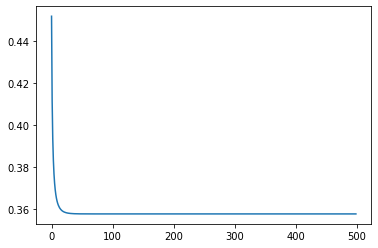

In [95]:
# Initialising the vector forms
X, Y = X_train, Y_train
X_t = np.transpose(X)

# Initialising the parameters
theta = np.zeros((X_train.shape[1], 1), dtype = np.float64)

# Initialising the hyperparameters
alpha = 0.005
epochs = 500

# Storing the cost at each epoch
cost_list = []

m = X.shape[0]
n = X.shape[1]

# Starting the Gradient Descnet algorithm
for i in range(0, epochs):
    # Calculating hypothesis
    g = h(X, theta)
    pd = np.subtract(g, Y)

    # Calculating Partial derivative
    pd = (X_t @ pd)

    # Updating theta
    theta = theta - alpha*(pd)

    # Finding the cost
    cost = J(X, Y, theta)
    print("At epoch ", i, " cost is: ", cost)
    cost_list.append(cost[0][0])

# Plotting cost vs epoch
plt.plot(list(range(0, epochs)), cost_list)

#### Making predictions

In [96]:
def get_predictions(X_test, theta):
    predictions = h(X_test, theta)

    # Places 1 where condition is satisfied and 0 otherwise
    predictions = np.where(predictions >= 0.5, 1, 0)
    return predictions

### Evaluating the model accuracy

In [97]:
# Getting the predictions on test data
predictions = get_predictions(X_test, theta)

# Getting the accuracy
accuracy = (predictions == Y_test).mean()
print("Accuracy of the model is: ", accuracy)

Accuracy of the model is:  0.8688524590163934


##### So, the accuracy of our model is 86.88524%